### __Indice__
- [1.0 Importando librerias](#1.0-Importando-librerias) <font color=green>--> Ok</font>  
- [2.0 Carga del dataset](#2.0-Carga-del-dataset) <font color=green>--> Ok</font>  
- [3.0 Análisis exploratoria de los datos](#3.0-Análisis-exploratoria-de-los-datos) <font color=green>--> Ok</font>  
    - [3.1 Eliminando columnas desnecesarias](#3.1-Eliminando-columnas-desnecesarias) <font color=green>--> Ok</font>  
    - [3.2 Limpiando las features](#3.2-Limpiando-las-features) <font color=green>--> Ok</font>  
    - [3.3 Conociendo las features](#3.3-Conociendo-las-features) <font color=green>--> Ok</font>  
    - [3.4 Consolidando el tiempo](#3.4-Consolidando-el-tiempo) <font color=green>--> Ok</font>  
    - [3.5 Analisando la correlación entre las variables](#3.5-Analisando-la-correlación-entre-las-variables) <font color=green>--> Ok</font>  
- [4.0 Completando el dataset con información de la NBA_API](#4.0-Completando-el-dataset-con-información-de-la-NBA_API) <font color=green>--> Ok</font>  
    - [4.1 Información de los jugadores](#4.1-Información-de-los-jugadores)  <font color=green>--> Ok</font>
    - [4.2 Información de los partidos](#4.2-Información-de-los-partidos) <font color=green>--> Ok</font>  
    - [4.3 Información de los equipos](#4.3-Información-de-los-equipos) <font color=green>--> Ok</font>  
- [5.0 Transformando las dummies](#5.0-Transformando-las-dummies) <font color=green>--> Ok</font>  
    - [5.1 Equipos](#5.1-Equipos) <font color=green>--> Ok</font>  
    - [5.2 Estilos de tiro](#5.2-Estilos-de-tiro) <font color=green>--> Ok</font>  
    - [5.3 Puntos por tiro](#5.3-Puntos-por-tiro) <font color=green>--> Ok</font>  
- [6.0 Finalizando el dataset](#6.0-Finalizando-el-dataset) <font color=green>--> Ok</font>  
    - [6.1 Limpiando columnas y lineas](#6.1-Limpiando-columnas-y-lineas) <font color=green>--> Ok</font>  
    - [6.1 Last check](#6.2-Last-check) <font color=green>--> Ok</font>  
    - [6.2 Exportando el dataset a un nuevo CSV](#6.3-Exportando-el-dataset-a-un-nuevo-CSV) <font color=green>--> Ok</font>  
***

# Desafío 3 - NBA (Parte 1: Dataset)
Predecir si un es un "shot made" (45%) o "shot missed" (55%) en la temporada 2104-15, considerando 30 equipos, ~500 jugadores, ~1.200 partidos y ~220.000 tiros

## 1.0 Importando librerias

In [ ]:
#Instalando librerías adicionales
!pip install pandas-profiling

In [2]:
#Instalando librerías nba_api
!pip install nba_api

You are using pip version 19.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#Eliminando warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
#Importar librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

import pandas_profiling

import re

from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import teamdashboardbyteamperformance

## 2.0 Carga del dataset

In [4]:
df = pd.read_csv("nba_savant.csv")

In [5]:
df.head(10)

,name,team_name,game_date,season,espn_player_id,team_id,espn_game_id,period,minutes_remaining,seconds_remaining,...,shot_type,shot_distance,opponent,x,y,dribbles,touch_time,defender_name,defender_distance,shot_clock
0,Al Horford,Atlanta Hawks,11/8/2014,2014,3213.0,1610612737,400578376.0,4,6,20,...,2PT Field Goal,0,New York Knicks,0,1,0,0.4,"Stoudemire, Amare",0.8,0.0
1,Al Horford,Atlanta Hawks,2/25/2015,2014,3213.0,1610612737,400579135.0,4,8,21,...,2PT Field Goal,0,Dallas Mavericks,0,1,1,4.4,"Smith, Greg",2.7,16.0
2,Al Horford,Atlanta Hawks,12/22/2014,2014,3213.0,1610612737,400578705.0,2,0,31,...,2PT Field Goal,0,Dallas Mavericks,0,1,0,0.2,"Chandler, Tyson",3.7,20.0
3,Al Horford,Atlanta Hawks,5/11/2015,2014,3213.0,1610612737,400793784.0,3,1,54,...,2PT Field Goal,0,Washington Wizards,0,1,1,1.5,"Gooden, Drew",6.1,24.0
4,Al Horford,Atlanta Hawks,2/9/2015,2014,3213.0,1610612737,400579071.0,4,8,8,...,2PT Field Goal,0,Minnesota Timberwolves,0,1,0,1.8,"Rubio, Ricky",7.0,24.0
5,Al Horford,Atlanta Hawks,1/13/2015,2014,3213.0,1610612737,400578860.0,1,8,8,...,2PT Field Goal,0,Philadelphia 76ers,0,1,1,0.4,"Noel, Nerlens",3.5,24.0
6,Paul Millsap,Atlanta Hawks,4/22/2015,2014,3015.0,1610612737,400790922.0,1,10,23,...,2PT Field Goal,0,Brooklyn Nets,0,1,0,0.2,"Lopez, Brook",9.6,0.0
7,Al Horford,Atlanta Hawks,4/10/2015,2014,3213.0,1610612737,400579468.0,3,9,42,...,2PT Field Goal,0,Charlotte Hornets,0,1,0,0.2,"Biyombo, Bismack",3.5,13.7
8,Al Horford,Atlanta Hawks,3/9/2015,2014,3213.0,1610612737,400579231.0,3,9,15,...,2PT Field Goal,0,Sacramento Kings,0,1,1,1.0,"McCallum, Ray",4.2,24.0
9,Paul Millsap,Atlanta Hawks,3/25/2015,2014,3015.0,1610612737,400579354.0,4,5,6,...,2PT Field Goal,0,Orlando Magic,0,1,0,0.0,NaN,0.0,0.0


In [6]:
df.shape

(219240, 22)

## 3.0 Análisis exploratoria de los datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219240 entries, 0 to 219239
Data columns (total 22 columns):
name                 219240 non-null object
team_name            219240 non-null object
game_date            219240 non-null object
season               219240 non-null int64
espn_player_id       215313 non-null float64
team_id              219240 non-null int64
espn_game_id         217194 non-null float64
period               219240 non-null int64
minutes_remaining    219240 non-null int64
seconds_remaining    219240 non-null int64
shot_made_flag       219240 non-null int64
action_type          219240 non-null object
shot_type            219240 non-null object
shot_distance        219240 non-null int64
opponent             219240 non-null object
x                    219240 non-null int64
y                    219240 non-null int64
dribbles             219240 non-null int64
touch_time           219240 non-null float64
defender_name        217140 non-null object
defender_distanc

### 3.1 Eliminando columnas que no vamos a utilizar

In [8]:
print (df.shape, '\n')
print (df.columns)

(219240, 22) 

Index(['name', 'team_name', 'game_date', 'season', 'espn_player_id', 'team_id',
       'espn_game_id', 'period', 'minutes_remaining', 'seconds_remaining',
       'shot_made_flag', 'action_type', 'shot_type', 'shot_distance',
       'opponent', 'x', 'y', 'dribbles', 'touch_time', 'defender_name',
       'defender_distance', 'shot_clock'],
      dtype='object')


In [9]:
df.drop(['season','espn_player_id', 'espn_game_id'], axis=1, inplace=True)

In [10]:
df.shape

(219240, 19)

### 3.2 Limpiando las features

In [11]:
df.isnull().sum()

name                    0
team_name               0
game_date               0
team_id                 0
period                  0
minutes_remaining       0
seconds_remaining       0
shot_made_flag          0
action_type             0
shot_type               0
shot_distance           0
opponent                0
x                       0
y                       0
dribbles                0
touch_time              0
defender_name        2100
defender_distance       0
shot_clock              0
dtype: int64

In [12]:
df['period'][df['period']<1] = np.nan
df['minutes_remaining'][df['minutes_remaining']<0] = np.nan
df['minutes_remaining'][df['minutes_remaining']>12] = np.nan
df['seconds_remaining'][df['seconds_remaining']<0] = np.nan
df['seconds_remaining'][df['seconds_remaining']>60] = np.nan
df['shot_distance'][df['shot_distance']<0] = np.nan
df['x'][df['x']<-255] = np.nan
df['x'][df['x']>+255] = np.nan
df['y'][df['y']<-55] = np.nan
df['y'][df['y']>+855] = np.nan
df['dribbles'][df['dribbles']<0] = np.nan
df['touch_time'][df['touch_time']<0] = np.nan
df['touch_time'][df['touch_time']>24] = np.nan
df['defender_distance'][df['defender_distance']<0] = np.nan
df['shot_clock'][df['shot_clock']<0] = np.nan
df['shot_clock'][df['shot_clock']>24] = np.nan

In [13]:
df.isnull().sum()

name                    0
team_name               0
game_date               0
team_id                 0
period                  0
minutes_remaining       0
seconds_remaining       0
shot_made_flag          0
action_type             0
shot_type               0
shot_distance           0
opponent                0
x                       0
y                       0
dribbles                0
touch_time            476
defender_name        2100
defender_distance       0
shot_clock              0
dtype: int64

In [14]:
df = df.dropna(axis = 0, how = 'any')
df.shape

(216664, 19)

### 3.3 Conociendo las features

In [15]:
#Variables tipo texto
print ('Jugadores', '\n', df.name.value_counts(), '\n')
print ('Equipo', '\n', df.team_name.value_counts(), '\n')
print ('Fechas partidos', '\n', df.game_date.value_counts(), '\n')
print ('Tiros', '\n', df.action_type.value_counts(), '\n')
print ('Tipo de tiros', '\n', df.shot_type.value_counts(), '\n')
print ('Equipo adversario', '\n', df.opponent.value_counts(), '\n')
print ('Defensor', '\n', df.defender_name.value_counts(), '\n')

Jugadores 
 LeBron James           1804
Stephen Curry          1760
James Harden           1736
Klay Thompson          1620
LaMarcus Aldridge      1516
Monta Ellis            1464
Damian Lillard         1451
Russell Westbrook      1446
Kyrie Irving           1395
Blake Griffin          1388
Chris Paul             1347
John Wall              1268
Pau Gasol              1260
Anthony Davis          1256
Marc Gasol             1250
Nikola Vucevic         1196
Tyreke Evans           1195
Josh Smith             1178
Al Horford             1163
Dirk Nowitzki          1146
Paul Millsap           1133
Jimmy Butler           1122
Joe Johnson            1119
Jeff Teague            1110
Andrew Wiggins         1105
Kyle Lowry             1098
Rudy Gay               1097
Zach Randolph          1095
JJ Redick              1083
Gordon Hayward         1083
                       ... 
Shannon Brown            19
Will Cherry              19
Drew Gordon              19
Glen Rice Jr             15
Cameron 

In [16]:
#Variables tipo integer
print ('Team ID', '\n', df.team_id.value_counts(), '\n')
print ('Período', '\n', df.period.value_counts(), '\n')
print ('Minutos faltantes', '\n', df.minutes_remaining.value_counts(), '\n')
print ('Segundos faltantes', '\n', df.seconds_remaining.value_counts(), '\n')
print ('Convertido o no', '\n', df.shot_made_flag.value_counts(), '\n')
print ('Distancia del tiro', '\n', df.shot_distance.value_counts(), '\n')
print ('Coordenada X', '\n', df.x.value_counts(), '\n')
print ('Coordenada Y', '\n', df.y.value_counts(), '\n')
print ('Picadas de la pelota', '\n', df.dribbles.value_counts(), '\n')

Team ID 
 1610612744    8784
1610612739    8287
1610612745    8121
1610612737    7957
1610612746    7908
1610612741    7752
1610612763    7630
1610612764    7593
1610612738    7509
1610612742    7479
1610612757    7428
1610612759    7323
1610612751    7278
1610612761    7150
1610612743    7120
1610612749    7111
1610612765    7016
1610612740    7011
1610612760    6980
1610612756    6920
1610612747    6911
1610612766    6819
1610612754    6791
1610612753    6757
1610612755    6741
1610612750    6627
1610612752    6603
1610612758    6480
1610612762    6451
1610612748    6127
Name: team_id, dtype: int64 

Período 
 1    56267
2    54187
3    52895
4    51540
5     1430
6      277
7       68
Name: period, dtype: int64 

Minutos faltantes 
 0     22296
9     18307
1     18200
8     18125
10    18117
6     18081
7     17978
4     17908
3     17774
5     17702
2     17647
11    14525
12        4
Name: minutes_remaining, dtype: int64 

Segundos faltantes 
 0     6163
1     4433
2     3991
44  

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


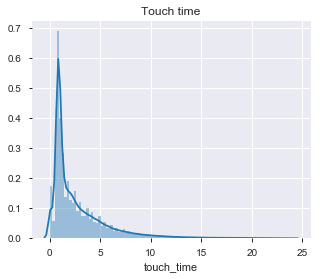

In [17]:
#Variables tipo float
plt.figure(figsize=(5,4))
plt.title('Touch time')
sns.distplot(df.touch_time, bins = 100)

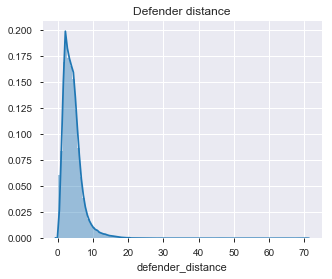

In [18]:
plt.figure(figsize=(5,4))
plt.title('Defender distance')
sns.distplot(df.defender_distance, bins = 100)

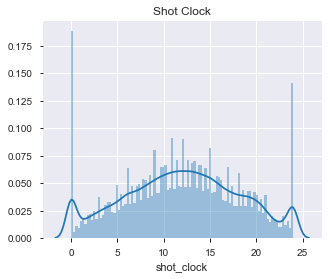

In [19]:
plt.figure(figsize=(5,4))
plt.title('Shot Clock')
sns.distplot(df.shot_clock, bins = 100)

### 3.4 Consolidando el tiempo

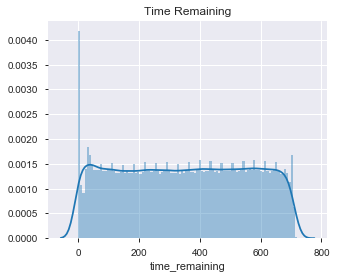

In [20]:
df['time_remaining'] = df['minutes_remaining'] * 60 + df['seconds_remaining']
plt.figure(figsize=(5,4))
plt.title('Time Remaining')
sns.distplot(df.time_remaining, bins = 100)

In [21]:
df.columns

Index(['name', 'team_name', 'game_date', 'team_id', 'period',
       'minutes_remaining', 'seconds_remaining', 'shot_made_flag',
       'action_type', 'shot_type', 'shot_distance', 'opponent', 'x', 'y',
       'dribbles', 'touch_time', 'defender_name', 'defender_distance',
       'shot_clock', 'time_remaining'],
      dtype='object')

In [22]:
df.drop(['minutes_remaining','seconds_remaining'], axis=1, inplace=True)

In [23]:
df.shape

(216664, 18)

### 3.5 Analisando la correlación entre las variables

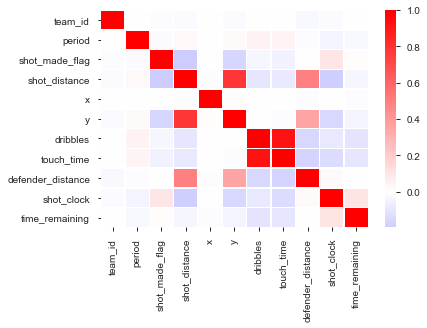

In [26]:
sns.heatmap(df.corr(),  center=0, cmap='bwr', annot=False, linewidths=.5, fmt='.3f')

In [27]:
df.columns

Index(['name', 'team_name', 'game_date', 'team_id', 'period', 'shot_made_flag',
       'action_type', 'shot_type', 'shot_distance', 'opponent', 'x', 'y',
       'dribbles', 'touch_time', 'defender_name', 'defender_distance',
       'shot_clock', 'time_remaining'],
      dtype='object')

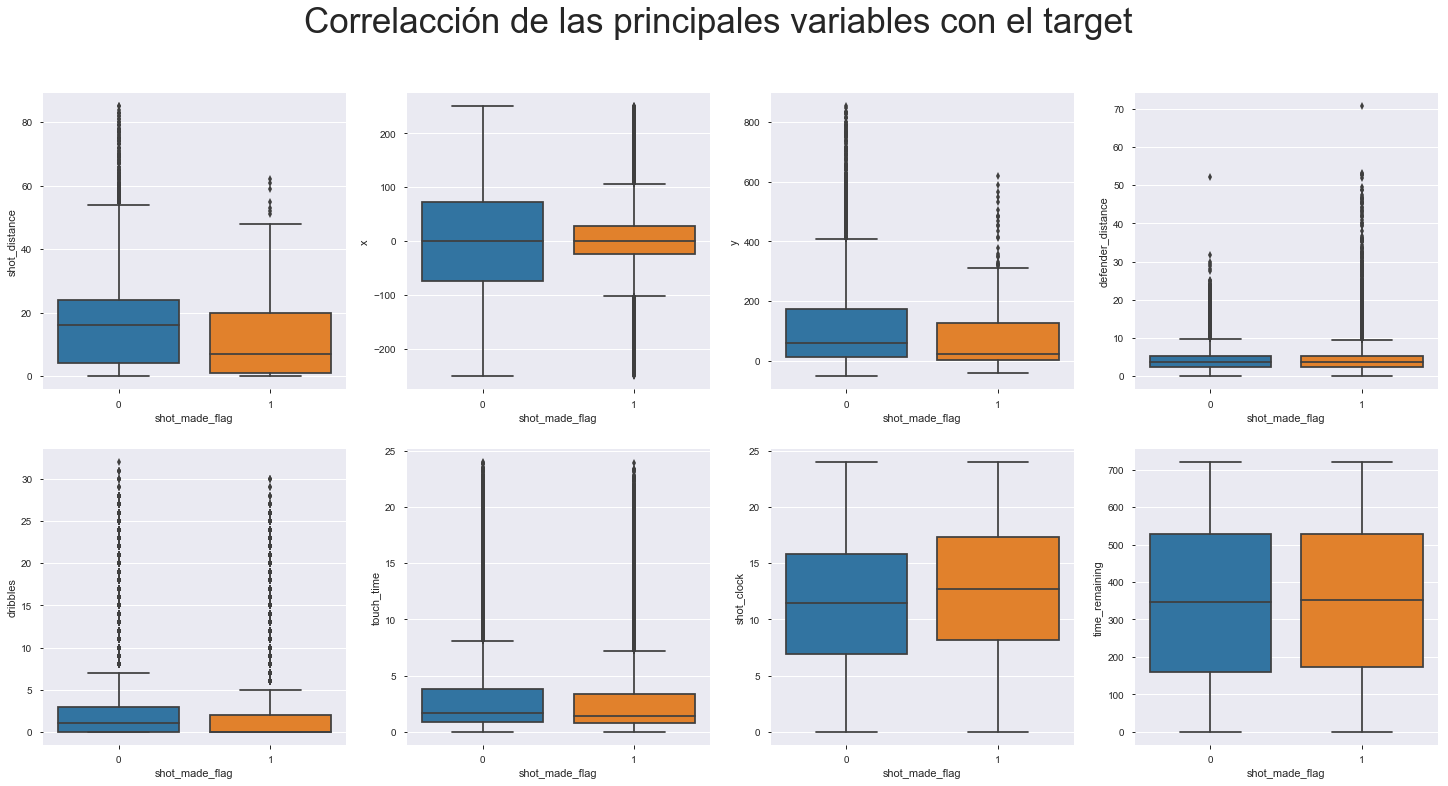

In [28]:
#Correlacción de las principales variables con el target
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,12))
f.suptitle('Correlacción de las principales variables con el target', size=35)
sns.boxplot(x="shot_made_flag", y="shot_distance", data=df, ax=axes[0,0])
sns.boxplot(x="shot_made_flag", y="x", data=df, ax=axes[0,1])
sns.boxplot(x="shot_made_flag", y="y", data=df, ax=axes[0,2])
sns.boxplot(x="shot_made_flag", y="defender_distance", data=df, ax=axes[0,3])
sns.boxplot(x="shot_made_flag", y="dribbles", data=df, ax=axes[1,0])
sns.boxplot(x="shot_made_flag", y="touch_time", data=df, ax=axes[1,1])
sns.boxplot(x="shot_made_flag", y="shot_clock", data=df, ax=axes[1,2])
sns.boxplot(x="shot_made_flag", y="time_remaining", data=df, ax=axes[1,3])

## 4.0 Completando el dataset con información de la NBA_API

### 4.1 Información de los jugadores

#### 4.1.1 Identificar todos los jugadores

In [29]:
jugadores = pd.DataFrame()
jugadores['name'] = np.unique(df['name'])

#### 4.1.2 Funcciones

In [30]:
def findPlayerId(player_name):
    try:
        player_info = players.find_players_by_full_name(player_name)
        return int(player_info[0]['id'])
    except:
        return np.nan

In [31]:
def findPlayerInfo(p_id):
    try: 
        player_info = commonplayerinfo.CommonPlayerInfo(player_id = p_id)
        player_info = player_info.get_data_frames()[0]
        player_info['HEIGHT'][0] = convertHeight(player_info['HEIGHT'][0])    
        player_info['AGE'] = converAge(player_info['BIRTHDATE'][0])
        player_info = player_info[['FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'HEIGHT', 'WEIGHT', 'SEASON_EXP',
       'POSITION', 'AGE']]
        return player_info
    except:
         return np.nan

In [32]:
def convertHeight(p_height):
    pattern = r'((\d*)-(\d*))'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    h = regex.findall(p_height)
    height = np.nan
    if h != '':
        height = int(h[0][1])*12 + int(h[0][2])
    
    return height

In [33]:
def converAge(player_age):
    age = np.nan
    pattern = r'((\d)(\d)(\d)(\d))'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    a = regex.findall(player_age)
    age = 2014 - int(a[0][0])
    return age

#### 4.1.3 Popular el dataset

In [34]:
 jugadores['player_id'] =jugadores['name'].apply(lambda x: findPlayerId(x))

In [35]:
jugadores = jugadores.dropna();

In [36]:
player_info = pd.DataFrame(index=jugadores.index, columns = ['FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'HEIGHT', 'WEIGHT', 'SEASON_EXP',
       'POSITION', 'AGE'])

player_info = jugadores['player_id'].apply(lambda x: findPlayerInfo(int(x)))

In [37]:
player_info = player_info.dropna();
player = pd.DataFrame(columns = ['FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'HEIGHT', 'WEIGHT', 'SEASON_EXP',
       'POSITION', 'AGE'])
for value in player_info:
    player = player.append(value)

In [38]:
player.head(5)

,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,HEIGHT,WEIGHT,SEASON_EXP,POSITION,AGE
0,Aaron,Brooks,Aaron Brooks,"Brooks, Aaron",A. Brooks,72,161,9,Guard,29
0,Aaron,Gordon,Aaron Gordon,"Gordon, Aaron",A. Gordon,81,220,5,Forward,19
0,Al,Horford,Al Horford,"Horford, Al",A. Horford,82,245,12,Center-Forward,28
0,Al,Jefferson,Al Jefferson,"Jefferson, Al",A. Jefferson,82,280,13,Center,29
0,Alan,Anderson,Alan Anderson,"Anderson, Alan",A. Anderson,78,220,8,Forward-Guard,32


In [39]:
player['AGE'].value_counts()

26    37
24    37
23    36
22    30
25    29
29    28
28    27
27    19
21    18
34    16
32    14
30    13
31    12
33    10
20    10
19     7
37     6
35     3
36     3
38     3
58     1
56     1
41     1
67     1
Name: AGE, dtype: int64

In [40]:
player['AGE'][player['AGE']>41] = np.nan

In [41]:
player = player.dropna()

### Convertimos a numeric y revisames un poco los datos

In [42]:
player.dtypes

FIRST_NAME                  object
LAST_NAME                   object
DISPLAY_FIRST_LAST          object
DISPLAY_LAST_COMMA_FIRST    object
DISPLAY_FI_LAST             object
HEIGHT                      object
WEIGHT                      object
SEASON_EXP                  object
POSITION                    object
AGE                         object
dtype: object

In [55]:
player['AGE'] = pd.to_numeric((player['AGE']))

In [56]:
player['HEIGHT'].value_counts()

81     47
82     42
79     37
83     36
75     36
80     35
78     32
84     27
76     22
77     20
73     17
74     11
85      7
72      7
71      3
86      2
6-9     1
69      1
Name: HEIGHT, dtype: int64

In [57]:
player['HEIGHT'][player['HEIGHT']=="6-9"] = 81

In [58]:
player['HEIGHT'].value_counts()

81    48
82    42
79    37
83    36
75    36
80    35
78    32
84    27
76    22
77    20
73    17
74    11
85     7
72     7
71     3
86     2
69     1
Name: HEIGHT, dtype: int64

In [59]:
player['HEIGHT'] = pd.to_numeric((player['HEIGHT']))

In [60]:
player['WEIGHT'].value_counts()

250    25
220    24
200    20
205    18
235    16
225    16
240    16
190    15
230    15
245    14
215    14
210    13
185    12
195    10
175    10
260    10
255     9
265     9
270     7
228     6
218     5
237     5
212     5
232     4
253     4
194     4
275     3
180     3
248     3
222     2
       ..
173     1
196     1
231     1
280     1
191     1
189     1
252     1
187     1
207     1
192     1
181     1
202     1
188     1
203     1
274     1
201     1
249     1
216     1
246     1
233     1
199     1
251     1
184     1
254     1
262     1
278     1
307     1
263     1
289     1
279     1
Name: WEIGHT, Length: 80, dtype: int64

In [61]:
player['WEIGHT'] = pd.to_numeric((player['WEIGHT']))

In [62]:
player.columns

Index(['FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'HEIGHT', 'WEIGHT',
       'SEASON_EXP', 'POSITION', 'AGE'],
      dtype='object')

In [63]:
player_info_defender = player.rename(columns={'DISPLAY_LAST_COMMA_FIRST': 'DISPLAY_LAST_COMMA_FIRST_DEFENDER', 'HEIGHT': 'HEIGHT_DEFENDER', 'WEIGHT':'WEIGHT_DEFENDER', 'SEASON_EXP':'SEASON_EXP_DEFENDER', 'POSITION':'POSITION_DEFENDER', 'AGE':'AGE_DEFENDER'})
player_info_defender = player_info_defender.drop(['FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST', 'DISPLAY_FI_LAST'], axis=1)
player_info_player = player.rename(columns={'DISPLAY_FIRST_LAST': 'DISPLAY_FIRST_LAST_PLAYER', 'HEIGHT': 'HEIGHT_PLAYER', 'WEIGHT':'WEIGHT_PLAYER', 'SEASON_EXP':'SEASON_EXP_PLAYER', 'POSITION':'POSITION_PLAYER', 'AGE':'AGE_PLAYER'})
player_info_player = player_info_player.drop(['FIRST_NAME', 'LAST_NAME', 'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST'], axis=1)

In [64]:
player_info_defender.head()

,DISPLAY_LAST_COMMA_FIRST_DEFENDER,HEIGHT_DEFENDER,WEIGHT_DEFENDER,SEASON_EXP_DEFENDER,POSITION_DEFENDER,AGE_DEFENDER
0,"Brooks, Aaron",72,161,9,Guard,29
0,"Gordon, Aaron",81,220,5,Forward,19
0,"Horford, Al",82,245,12,Center-Forward,28
0,"Jefferson, Al",82,280,13,Center,29
0,"Anderson, Alan",78,220,8,Forward-Guard,32


In [65]:
player_info_player.head()

,DISPLAY_FIRST_LAST_PLAYER,HEIGHT_PLAYER,WEIGHT_PLAYER,SEASON_EXP_PLAYER,POSITION_PLAYER,AGE_PLAYER
0,Aaron Brooks,72,161,9,Guard,29
0,Aaron Gordon,81,220,5,Forward,19
0,Al Horford,82,245,12,Center-Forward,28
0,Al Jefferson,82,280,13,Center,29
0,Alan Anderson,78,220,8,Forward-Guard,32


In [66]:
df = pd.merge(df, player_info_player, left_on=['name'], right_on=['DISPLAY_FIRST_LAST_PLAYER'], how = 'left')

In [67]:
df.columns

Index(['name', 'team_name', 'game_date', 'team_id', 'period', 'shot_made_flag',
       'action_type', 'shot_type', 'shot_distance', 'opponent', 'x', 'y',
       'dribbles', 'touch_time', 'defender_name', 'defender_distance',
       'shot_clock', 'time_remaining', 'DISPLAY_FIRST_LAST_PLAYER',
       'HEIGHT_PLAYER', 'WEIGHT_PLAYER', 'SEASON_EXP_PLAYER',
       'POSITION_PLAYER', 'AGE_PLAYER'],
      dtype='object')

In [68]:
df = pd.merge(df, player_info_defender, left_on=['defender_name'], right_on=['DISPLAY_LAST_COMMA_FIRST_DEFENDER'], how = 'left')

In [69]:
df = df.drop(['DISPLAY_LAST_COMMA_FIRST_DEFENDER', 'DISPLAY_FIRST_LAST_PLAYER'], axis = 1)

In [70]:
df = df.dropna(subset=['AGE_PLAYER'])

In [71]:
df.shape

(186690, 28)

In [72]:
df = df.dropna(subset=['AGE_DEFENDER'])

In [73]:
df.shape

(160691, 28)

### 4.2 Información de los partidos

In [74]:
df.shape

(160691, 28)

In [76]:
gamefinder = leaguegamefinder.LeagueGameFinder(player_or_team_abbreviation = 'T', season_nullable = '2014-15')
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42014,1610612739,CLE,Cleveland Cavaliers,0041400406,2015-06-16,CLE vs. GSW,L,239,97,...,0.692,16,40,56,14,3,7,16,26,-8.0
1,42014,1610612744,GSW,Golden State Warriors,0041400406,2015-06-16,GSW @ CLE,W,239,105,...,0.621,7,32,39,28,11,4,9,27,8.0
2,42014,1610612744,GSW,Golden State Warriors,0041400405,2015-06-14,GSW vs. CLE,W,239,104,...,0.588,11,32,43,25,7,2,16,25,13.0
3,42014,1610612739,CLE,Cleveland Cavaliers,0041400405,2015-06-14,CLE @ GSW,L,241,91,...,0.714,10,27,37,17,10,4,10,28,-13.0
4,42014,1610612739,CLE,Cleveland Cavaliers,0041400404,2015-06-11,CLE vs. GSW,L,239,82,...,0.714,16,33,49,16,2,3,9,19,-21.0


In [90]:
regular_start = datetime.strptime('2014-10-28', '%Y-%m-%d')
regular_end = datetime.strptime('2015-04-15', '%Y-%m-%d')
playoff_start = datetime.strptime('2015-04-18', '%Y-%m-%d')
playoff_end = datetime.strptime('2015-06-16', '%Y-%m-%d')

In [91]:
df['home_game'] = np.nan
df['playoff'] = np.nan

In [92]:
df['game_datetime'] = df['game_date']

In [93]:
def fecha_formato (fecha_input):
    fecha = fecha_input
    if re.search(r'\b/\b', fecha):
        date_object = datetime.strptime(fecha, '%m/%d/%Y')
        fecha = datetime.strftime(date_object, '%Y-%m-%d')
    return fecha

In [94]:
def fecha_datetime (fecha_input):
    fecha = fecha_input
    if re.search(r'\b/\b', fecha):
        date_object = datetime.strptime(fecha, '%m/%d/%Y')
    else:
        date_object = datetime.strptime(fecha, '%Y-%m-%d')
    return date_object

In [95]:
df['game_date'] = df['game_date'].apply(lambda x: fecha_formato(x))

In [96]:
df['game_datetime'] = df['game_datetime'].apply(lambda x: fecha_datetime(x))

In [97]:
df = pd.merge(df, games[['GAME_DATE', 'TEAM_NAME', 'MATCHUP']], left_on=['game_date', 'team_name'], right_on=['GAME_DATE', 'TEAM_NAME'])

In [98]:
def casa_visitante(partido):
    if re.search(r'\b vs. \b', partido):
        casa = 1
    if re.search(r'\b @ \b', partido):
        casa = 0
    return casa

In [99]:
def regular_playoff(datetime):
    if (datetime >= regular_start) & (datetime <= regular_end):
        playoff = 0
    if (datetime >= playoff_start) & (datetime <= playoff_end):
        playoff = 1
    return playoff

In [100]:
df['home_game'] = df['MATCHUP'].apply(lambda x: casa_visitante(x))

In [101]:
df['playoff'] = df['game_datetime'].apply(lambda x: regular_playoff(x))

In [102]:
df.shape

(160691, 40)

In [103]:
df.columns

Index(['name', 'team_name', 'game_date', 'team_id', 'period', 'shot_made_flag',
       'action_type', 'shot_type', 'shot_distance', 'opponent', 'x', 'y',
       'dribbles', 'touch_time', 'defender_name', 'defender_distance',
       'shot_clock', 'time_remaining', 'HEIGHT_PLAYER', 'WEIGHT_PLAYER',
       'SEASON_EXP_PLAYER', 'POSITION_PLAYER', 'AGE_PLAYER', 'HEIGHT_DEFENDER',
       'WEIGHT_DEFENDER', 'SEASON_EXP_DEFENDER', 'POSITION_DEFENDER',
       'AGE_DEFENDER', 'home_game', 'playoff', 'game_datetime', 'GAME_DATE_x',
       'TEAM_NAME_x', 'MATCHUP_x', 'GAME_DATE_y', 'TEAM_NAME_y', 'MATCHUP_y',
       'GAME_DATE', 'TEAM_NAME', 'MATCHUP'],
      dtype='object')

In [104]:
df.drop(['game_date', 'game_datetime', 'GAME_DATE', 'TEAM_NAME', 'MATCHUP'], axis=1, inplace=True)

### 4.3 Información de los equipos

In [105]:
team = teams.get_teams()
team = pd.DataFrame(team)
team.head()

,abbreviation,city,full_name,id,nickname,state,year_founded
0,ATL,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949
1,BOS,Boston,Boston Celtics,1610612738,Celtics,Massachusetts,1946
2,CLE,Cleveland,Cleveland Cavaliers,1610612739,Cavaliers,Ohio,1970
3,NOP,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002
4,CHI,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966


In [106]:
team['team_player_shots'] = np.nan

In [107]:
def tiros_hechos_equipos(team_id):
    info_equipo = teamdashboardbyteamperformance.TeamDashboardByTeamPerformance(team_id = team_id,
                                                                            season = '2013-14', 
                                                                            season_type_all_star = 'Regular Season')
    info_equipo = info_equipo.get_data_frames()[0]
    team_player_shots = info_equipo['FGM']/info_equipo['FGA']
    return team_player_shots

In [108]:
team['team_player_shots'] = team['id'].apply(lambda x: tiros_hechos_equipos(x))

In [109]:
df = pd.merge(df, team[['id', 'team_player_shots']], left_on=['team_id'], right_on=['id'])

In [110]:
df.drop(['id'], axis=1, inplace=True)

## 5.0 Transformando las dummies

### 5.1 Equipos

In [111]:
team['team_player'] = team['abbreviation']

In [112]:
team['team_defender'] = team['abbreviation']

In [113]:
df = pd.merge(df, team[['team_player', 'full_name']], left_on="team_name", right_on="full_name")

In [114]:
df = pd.merge(df, team[['team_defender', 'full_name']], left_on="opponent", right_on="full_name")

In [115]:
df.columns

Index(['name', 'team_name', 'team_id', 'period', 'shot_made_flag',
       'action_type', 'shot_type', 'shot_distance', 'opponent', 'x', 'y',
       'dribbles', 'touch_time', 'defender_name', 'defender_distance',
       'shot_clock', 'time_remaining', 'HEIGHT_PLAYER', 'WEIGHT_PLAYER',
       'SEASON_EXP_PLAYER', 'POSITION_PLAYER', 'AGE_PLAYER', 'HEIGHT_DEFENDER',
       'WEIGHT_DEFENDER', 'SEASON_EXP_DEFENDER', 'POSITION_DEFENDER',
       'AGE_DEFENDER', 'home_game', 'playoff', 'GAME_DATE_x', 'TEAM_NAME_x',
       'MATCHUP_x', 'GAME_DATE_y', 'TEAM_NAME_y', 'MATCHUP_y',
       'team_player_shots', 'team_player', 'full_name_x', 'team_defender',
       'full_name_y'],
      dtype='object')

In [116]:
df.drop(['full_name_x', 'full_name_y', 'team_name', 'team_id', 'opponent'], axis=1, inplace=True)

In [117]:
#pd.get_dummies(df, prefix = 'team', columns = 'team_player', drop_first = True)
#pd.get_dummies(df, prefix = 'team', columns = 'team_defender', drop_first = True)

In [118]:
#df.drop(['abbreviation'], axis=1, inplace=True)

### 5.2 Estilos de tiro

In [119]:
#Según la NBA se puede sumarizar los 50 estilos de tiro en 9 grandes grupos:
#  Alley Oop, Bank, Dunk, Fadeaway, Finger Roll, Hook, Jump, Layup, Tip
#Vamos a crear dummies con estos grupos y rellenarlos

In [120]:
estilos_de_tiro = {'alley':'alley', 
                   'bank':'bank', 
                   'dunk':'dunk', 
                   'fadeaway':'fadeaway', 
                   'finger':'finger',
                   'hook':'hook',
                   'jump':'jump',
                   'layup':'layup',
                   'tip':'tip'}

In [121]:
def create_dummies(dic, tp, col):
    for key, value in dic.items():
        if type(value) == list:
            words = ''
            for x in value:
                words += str(x) + '|'
            words = words[:-1]
            pattern = r'(' + str(words) +')'
        else:
            pattern = r'(' + str(value) +')'
        
        regex = re.compile(pattern, flags= re.IGNORECASE)
        exec('df["'+tp+'_'+key+'"] = df["'+col+'"].str.extract(regex, expand = True)')
        exec('df["'+tp+'_'+key+'"] = df["'+tp+'_'+key+'"].where(df["'+tp+'_'+key+'"].isnull(), 1).fillna(0).astype(int)')

In [122]:
df.columns

Index(['name', 'period', 'shot_made_flag', 'action_type', 'shot_type',
       'shot_distance', 'x', 'y', 'dribbles', 'touch_time', 'defender_name',
       'defender_distance', 'shot_clock', 'time_remaining', 'HEIGHT_PLAYER',
       'WEIGHT_PLAYER', 'SEASON_EXP_PLAYER', 'POSITION_PLAYER', 'AGE_PLAYER',
       'HEIGHT_DEFENDER', 'WEIGHT_DEFENDER', 'SEASON_EXP_DEFENDER',
       'POSITION_DEFENDER', 'AGE_DEFENDER', 'home_game', 'playoff',
       'GAME_DATE_x', 'TEAM_NAME_x', 'MATCHUP_x', 'GAME_DATE_y', 'TEAM_NAME_y',
       'MATCHUP_y', 'team_player_shots', 'team_player', 'team_defender'],
      dtype='object')

In [123]:
create_dummies(estilos_de_tiro, 'shot_type', 'action_type')

In [124]:
df.columns

Index(['name', 'period', 'shot_made_flag', 'action_type', 'shot_type',
       'shot_distance', 'x', 'y', 'dribbles', 'touch_time', 'defender_name',
       'defender_distance', 'shot_clock', 'time_remaining', 'HEIGHT_PLAYER',
       'WEIGHT_PLAYER', 'SEASON_EXP_PLAYER', 'POSITION_PLAYER', 'AGE_PLAYER',
       'HEIGHT_DEFENDER', 'WEIGHT_DEFENDER', 'SEASON_EXP_DEFENDER',
       'POSITION_DEFENDER', 'AGE_DEFENDER', 'home_game', 'playoff',
       'GAME_DATE_x', 'TEAM_NAME_x', 'MATCHUP_x', 'GAME_DATE_y', 'TEAM_NAME_y',
       'MATCHUP_y', 'team_player_shots', 'team_player', 'team_defender',
       'shot_type_alley', 'shot_type_bank', 'shot_type_dunk',
       'shot_type_fadeaway', 'shot_type_finger', 'shot_type_hook',
       'shot_type_jump', 'shot_type_layup', 'shot_type_tip'],
      dtype='object')

In [125]:
print (df.shot_type_alley.value_counts(), '\n')
print (df.shot_type_bank.value_counts(), '\n')
print (df.shot_type_dunk.value_counts(), '\n')
print (df.shot_type_fadeaway.value_counts(), '\n')
print (df.shot_type_finger.value_counts(), '\n')
print (df.shot_type_hook.value_counts(), '\n')
print (df.shot_type_jump.value_counts(), '\n')
print (df.shot_type_layup.value_counts(), '\n')
print (df.shot_type_tip.value_counts(), '\n')

0    159009
1      1682
Name: shot_type_alley, dtype: int64 

0    157677
1      3014
Name: shot_type_bank, dtype: int64 

0    153106
1      7585
Name: shot_type_dunk, dtype: int64 

0    157488
1      3203
Name: shot_type_fadeaway, dtype: int64 

0    159149
1      1542
Name: shot_type_finger, dtype: int64 

0    154265
1      6426
Name: shot_type_hook, dtype: int64 

1    105765
0     54926
Name: shot_type_jump, dtype: int64 

0    124481
1     36210
Name: shot_type_layup, dtype: int64 

0    157313
1      3378
Name: shot_type_tip, dtype: int64 



In [126]:
df.drop(['action_type'], axis=1, inplace=True)

In [127]:
df.columns

Index(['name', 'period', 'shot_made_flag', 'shot_type', 'shot_distance', 'x',
       'y', 'dribbles', 'touch_time', 'defender_name', 'defender_distance',
       'shot_clock', 'time_remaining', 'HEIGHT_PLAYER', 'WEIGHT_PLAYER',
       'SEASON_EXP_PLAYER', 'POSITION_PLAYER', 'AGE_PLAYER', 'HEIGHT_DEFENDER',
       'WEIGHT_DEFENDER', 'SEASON_EXP_DEFENDER', 'POSITION_DEFENDER',
       'AGE_DEFENDER', 'home_game', 'playoff', 'GAME_DATE_x', 'TEAM_NAME_x',
       'MATCHUP_x', 'GAME_DATE_y', 'TEAM_NAME_y', 'MATCHUP_y',
       'team_player_shots', 'team_player', 'team_defender', 'shot_type_alley',
       'shot_type_bank', 'shot_type_dunk', 'shot_type_fadeaway',
       'shot_type_finger', 'shot_type_hook', 'shot_type_jump',
       'shot_type_layup', 'shot_type_tip'],
      dtype='object')

In [128]:
df.shape

(160691, 43)

In [129]:
# No se dropea la primera columna, porque un mismo tiro puede tener más de un estilo

### 5.3 Puntos por tiro

In [130]:
df.shot_type.value_counts()

2PT Field Goal    117502
3PT Field Goal     43189
Name: shot_type, dtype: int64

In [131]:
df['shot_3pts'] = np.nan

In [132]:
df.loc[(df['shot_type'] == '2PT Field Goal'), 'shot_3pts'] = int(0)
df.loc[(df['shot_type'] == '3PT Field Goal'), 'shot_3pts'] = int(1)

In [133]:
df.shot_3pts.value_counts(dropna = False)

0.0    117502
1.0     43189
Name: shot_3pts, dtype: int64

In [134]:
df.drop(['shot_type'], axis=1, inplace=True)

## 6.0 Finalizando el dataset

### 6.1 Limpiando columnas y lineas

In [135]:
df.drop(['name', 'defender_name', 'team_player', 'team_defender', 'touch_time'], axis=1, inplace=True)

In [136]:
df.drop_duplicates(inplace=True)

### 6.2 Last check

In [137]:
df.shape

(160664, 38)

In [138]:
df.isnull().sum()

period                 0
shot_made_flag         0
shot_distance          0
x                      0
y                      0
dribbles               0
defender_distance      0
shot_clock             0
time_remaining         0
HEIGHT_PLAYER          0
WEIGHT_PLAYER          0
SEASON_EXP_PLAYER      0
POSITION_PLAYER        0
AGE_PLAYER             0
HEIGHT_DEFENDER        0
WEIGHT_DEFENDER        0
SEASON_EXP_DEFENDER    0
POSITION_DEFENDER      0
AGE_DEFENDER           0
home_game              0
playoff                0
GAME_DATE_x            0
TEAM_NAME_x            0
MATCHUP_x              0
GAME_DATE_y            0
TEAM_NAME_y            0
MATCHUP_y              0
team_player_shots      0
shot_type_alley        0
shot_type_bank         0
shot_type_dunk         0
shot_type_fadeaway     0
shot_type_finger       0
shot_type_hook         0
shot_type_jump         0
shot_type_layup        0
shot_type_tip          0
shot_3pts              0
dtype: int64

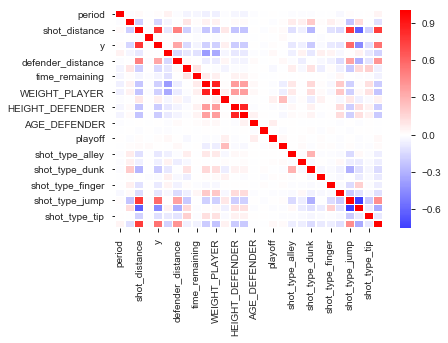

In [139]:
sns.heatmap(df.corr(),  center=0, cmap='bwr', annot=False, linewidths=.5, fmt='.1f')

In [ ]:
# Generando un profiling report en HTML
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="NBA dataset final.html")

### 6.3 Exportando el dataset a un nuevo CSV

In [112]:
df.to_csv(r'nba_final.csv', index = False)

# FIN.